#INICIO

In [335]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [337]:
filename='/content/drive/MyDrive/CODINGDOJO/Dashboards (Story Telling)/exports and imports of india(1997- July 2022) - exports and imports.csv.csv'
df=pd.read_csv(filename)
df.head()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [338]:
df=df.rename(columns={'Total Trade':'Total_Trade','Trade Balance':'Trade_Balance','Financial Year(start)':'Financial_Year_start','Financial Year(end)':'Financial_Year_end'})
df.head()

,Country,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [339]:
df.head()

,Country,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


#ANALISIS DE DATOS

In [340]:
df.to_excel('Expo_Impo_Mundial.xlsx', index= False)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               5994 non-null   object
 1   Export                5986 non-null   object
 2   Import                5442 non-null   object
 3   Total_Trade           5409 non-null   object
 4   Trade_Balance         5408 non-null   object
 5   Financial_Year_start  5994 non-null   int64 
 6   Financial_Year_end    5994 non-null   object
dtypes: int64(1), object(6)
memory usage: 327.9+ KB


In [342]:
#df['Financial_Year_start'] = df['Financial_Year_start'].replace('', pd.NaT)
#df['Financial_Year(end)'] = df['Financial_Year_end'].replace('', pd.NaT)

In [343]:
#df['Financial_Year(start)']=pd.to_datetime(df['Financial_Year(start)'], errors='coerce')
#df['Financial_Year(end)']=pd.to_datetime(df['Financial_Year(end)'], errors='coerce')

In [344]:
df['Export'] = df['Export'].replace(' ', pd.NaT)

In [345]:
df['Export']=pd.to_numeric(df['Export'], errors='coerce')
df['Import']=pd.to_numeric(df['Import'], errors='coerce')
df['Total_Trade']=pd.to_numeric(df['Total_Trade'], errors='coerce')
df['Trade_Balance']=pd.to_numeric(df['Trade_Balance'], errors='coerce')
df['Financial_Year_start']=pd.to_numeric(df['Financial_Year_start'], errors='coerce').astype('Int64')
df['Financial_Year_end']=pd.to_numeric(df['Financial_Year_end'], errors='coerce',).astype('Int64')

In [346]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               5994 non-null   object 
 1   Export                5129 non-null   float64
 2   Import                4501 non-null   float64
 3   Total_Trade           4071 non-null   float64
 4   Trade_Balance         4600 non-null   float64
 5   Financial_Year_start  5994 non-null   Int64  
 6   Financial_Year_end    5769 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 339.6+ KB


In [347]:
df.describe()

,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
count,5129.000000,4501.000000,4071.000000,4600.000000,5994.0,5769.0
mean,126.221805,110.657654,158.462918,14.349802,2009.596096,2010.112324
std,209.227581,206.514519,234.345141,240.739643,7.460527,7.182957
min,0.000000,0.000000,0.000000,-995.290000,1997.0,1998.0
25%,1.960000,0.580000,5.320000,-1.590000,2003.0,2004.0
50%,25.900000,11.260000,45.280000,4.785000,2010.0,2010.0
75%,147.690000,105.950000,208.240000,56.030000,2016.0,2016.0
max,997.580000,996.490000,998.680000,999.820000,2022.0,2022.0


In [348]:
nulos=df['Export'].isna()
df.loc[nulos].head()

,Country,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
67,ALGERIA,NaN,683.55,NaN,405.18,2012,2013
68,ALGERIA,NaN,860.90,NaN,208.62,2013,2014
69,ALGERIA,NaN,551.82,NaN,511.92,2014,2015
241,ARGENTINA,NaN,NaN,NaN,NaN,2021,2022
299,AUSTRALIA,NaN,NaN,NaN,NaN,2007,2008


In [349]:
nulos_fina_end=df['Financial_Year_end'].isna()
df.loc[nulos_fina_end].head()

,Country,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
25,AFGHANISTAN,147.56,94.03,241.58,53.53,2022,<NA>
51,ALBANIA,14.96,2.56,17.51,12.40,2022,<NA>
77,ALGERIA,148.84,332.79,481.62,-183.95,2022,<NA>
103,AMERI SAMOA,0.00,0.01,0.01,-0.01,2022,<NA>
129,ANDORRA,0.10,NaN,NaN,NaN,2022,<NA>


Dedido que el analisis es hasta el 2022 podemos eliminar todo los datos del 2022 de la caracteristica'Financial_Year_start' ya que no nos interesa

In [350]:
df.drop(df[df['Financial_Year_start']==2022].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 5992
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               5769 non-null   object 
 1   Export                4937 non-null   float64
 2   Import                4330 non-null   float64
 3   Total_Trade           3913 non-null   float64
 4   Trade_Balance         4424 non-null   float64
 5   Financial_Year_start  5769 non-null   Int64  
 6   Financial_Year_end    5769 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 371.8+ KB


Para imputar los valores NaN en la columna 'Export' utilizare la MEDIANA, para llenar los datos, ya que es menos sencible a los valores extremos y tambien tomando en cuanta que la desviacion estandar es muy alta.

In [351]:
mediana=df['Export'].median()
df['Export'].fillna(mediana, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 5992
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               5769 non-null   object 
 1   Export                5769 non-null   float64
 2   Import                4330 non-null   float64
 3   Total_Trade           3913 non-null   float64
 4   Trade_Balance         4424 non-null   float64
 5   Financial_Year_start  5769 non-null   Int64  
 6   Financial_Year_end    5769 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 371.8+ KB


In [352]:
mediana=df['Import'].median()
df['Import'].fillna(mediana, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 5992
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               5769 non-null   object 
 1   Export                5769 non-null   float64
 2   Import                5769 non-null   float64
 3   Total_Trade           3913 non-null   float64
 4   Trade_Balance         4424 non-null   float64
 5   Financial_Year_start  5769 non-null   Int64  
 6   Financial_Year_end    5769 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 371.8+ KB


In [353]:
total_trade=df['Export']+df['Import']
df['Total_Trade'].fillna(total_trade, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 5992
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               5769 non-null   object 
 1   Export                5769 non-null   float64
 2   Import                5769 non-null   float64
 3   Total_Trade           5769 non-null   float64
 4   Trade_Balance         4424 non-null   float64
 5   Financial_Year_start  5769 non-null   Int64  
 6   Financial_Year_end    5769 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 371.8+ KB


In [354]:
trade_balance=df['Export']-df['Import']
df['Trade_Balance'].fillna(trade_balance, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 5992
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               5769 non-null   object 
 1   Export                5769 non-null   float64
 2   Import                5769 non-null   float64
 3   Total_Trade           5769 non-null   float64
 4   Trade_Balance         5769 non-null   float64
 5   Financial_Year_start  5769 non-null   Int64  
 6   Financial_Year_end    5769 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 371.8+ KB


In [355]:
df.isna().sum()

Country                 0
Export                  0
Import                  0
Total_Trade             0
Trade_Balance           0
Financial_Year_start    0
Financial_Year_end      0
dtype: int64

In [356]:
df.head()

,Country,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
0,AFGHANISTAN,21.25,10.70,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.20,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [357]:
generator = df.groupby(['Country']).__iter__()
generator

<ipython-input-357-700125e9e89f>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  generator = df.groupby(['Country']).__iter__()


<generator object BaseGrouper.get_iterator at 0x78477d2adb60>

In [358]:
group_id, grouped_data = generator.__next__()
print(group_id)
grouped_data

AFGHANISTAN


,Country,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
0,AFGHANISTAN,21.25,10.70,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.20,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002
5,AFGHANISTAN,60.77,18.46,79.23,42.31,2002,2003
6,AFGHANISTAN,145.47,40.51,185.98,104.96,2003,2004
7,AFGHANISTAN,165.44,47.01,212.44,118.43,2004,2005
8,AFGHANISTAN,142.67,58.42,201.09,84.24,2005,2006
9,AFGHANISTAN,182.11,34.37,216.48,147.73,2006,2007


In [359]:
duplicates =df.duplicated(subset=['Country', 'Financial_Year_end'], keep=False)
duplicated_rows = df[duplicates]
if not duplicated_rows.empty:
    print("Filas duplicadas encontradas:")
    print(duplicated_rows)
else:
    print("No se encontraron filas duplicadas.")

No se encontraron filas duplicadas.


#Visualización

##Gráfico de comparación de las exportaciones e importaciones

In [360]:
df_export=df.groupby('Financial_Year_end')[['Export']].sum().reset_index()
df_export

,Financial_Year_end,Export
0,1998,16462.95
1,1999,14800.94
2,2000,16093.69
3,2001,18674.70
4,2002,19554.07
5,2003,20037.04
6,2004,19628.41
7,2005,21397.63
8,2006,20501.18
9,2007,24499.48


In [361]:
df_import=df.groupby('Financial_Year_end')[['Import']].sum().reset_index()
df_import

,Financial_Year_end,Import
0,1998,13735.295
1,1999,10814.570
2,2000,12642.175
3,2001,14267.375
4,2002,12974.375
5,2003,13467.335
6,2004,13415.640
7,2005,15797.500
8,2006,16950.305
9,2007,21127.635


In [362]:
df.to_excel('Importacion_Exportacion.xlsx')

<ipython-input-363-6270dc83852b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


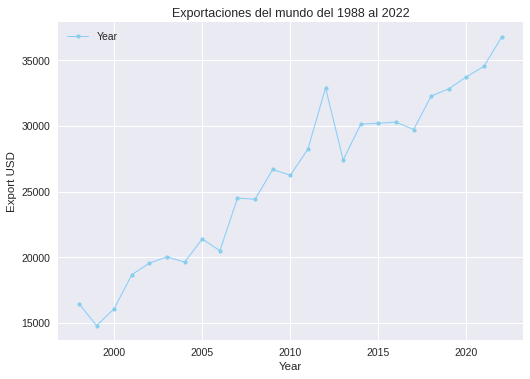

In [363]:
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(dpi=75) #resolución de figura (implica tamaño)
plt.plot(df_export['Financial_Year_end'],df_export['Export'], color="lightskyblue", marker='o',  markerfacecolor="skyblue",   lw=1,  ms=4,label="Year")
plt.ylabel("Export USD")
plt.xlabel("Year")
plt.title("Exportaciones del mundo del 1988 al 2022")
plt.legend()
plt.show()

<ipython-input-364-00b46610c629>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


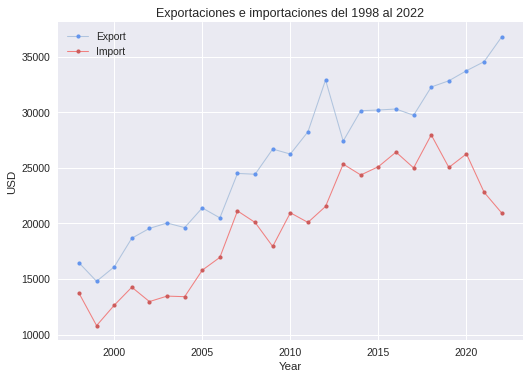

In [364]:
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(dpi=75) #resolución de figura (implica tamaño)
plt.plot(df_export['Financial_Year_end'],df_export['Export'], color="lightsteelblue", marker='o',  markerfacecolor="cornflowerblue",   lw=1,  ms=4,label="Export")
plt.plot(df_import['Financial_Year_end'],df_import['Import'], color="lightcoral", marker='o',  markerfacecolor="indianred",   lw=1,  ms=4,label="Import")
plt.ylabel("USD")
plt.xlabel("Year")
plt.title("Exportaciones e importaciones del 1998 al 2022")
plt.legend()
plt.show()

##Gráfico de las 10 ciudades con mayor exportación e importación

Los paises que mayor Exportacion e importacion hicieron del 2000 al 2022

In [365]:
df_export=df.sort_values(by='Export', ascending=False)
df_import=df.sort_values(by='Import', ascending=False)

In [366]:
df_export

,Country,Export,Import,Total_Trade,Trade_Balance,Financial_Year_start,Financial_Year_end
22,AFGHANISTAN,997.58,529.840,1527.420,467.740,2019,2020
420,BANGLADESH PR,995.64,62.400,1058.040,933.240,1998,1999
4295,POLAND,995.50,622.570,1618.070,372.940,2013,2014
4246,PHILIPPINES,992.91,441.380,1434.290,551.530,2011,2012
5933,YEMEN REPUBLC,992.13,540.680,1532.810,451.450,2014,2015
...,...,...,...,...,...,...,...
4994,ST PIERRE,0.00,11.255,11.255,-11.255,2014,2015
3958,NIUE IS,0.00,0.060,0.070,-0.060,2009,2010
3960,NIUE IS,0.00,0.000,0.010,0.000,2011,2012
3965,NIUE IS,0.00,11.255,11.255,-11.255,2020,2021


In [367]:
lista_export=list(df_export['Country'][:10].values)
lista_import=list(df_import['Country'][:10].values)
valor_export=list(df_export['Export'][:10].values)
valor_import=list(df_import['Import'][:10].values)

In [368]:
y_export = sorted(valor_export)
y_export

[978.06, 980.69, 984.04, 985.69, 989.8, 992.13, 992.91, 995.5, 995.64, 997.58]

In [369]:
y_import = sorted(valor_import)
y_import

[972.88,
 973.33,
 974.48,
 984.27,
 984.98,
 988.11,
 992.35,
 995.32,
 995.64,
 996.49]

In [370]:
lista_export

['AFGHANISTAN',
 'BANGLADESH PR',
 'POLAND',
 'PHILIPPINES',
 'YEMEN REPUBLC',
 'CHILE',
 'VIETNAM SOC REP',
 'SOUTH AFRICA',
 'RUSSIA',
 'SWITZERLAND']

In [371]:
x1 = list(reversed(lista_export))
x1

['SWITZERLAND',
 'RUSSIA',
 'SOUTH AFRICA',
 'VIETNAM SOC REP',
 'CHILE',
 'YEMEN REPUBLC',
 'PHILIPPINES',
 'POLAND',
 'BANGLADESH PR',
 'AFGHANISTAN']

In [372]:
lista_import

['UKRAINE',
 'SPAIN',
 'ALGERIA',
 'BRAZIL',
 'ISRAEL',
 'JORDAN',
 'MYANMAR',
 'BOTSWANA',
 'AUSTRIA',
 'EQUTL GUINEA']

In [373]:
x2 = list(reversed(lista_import))
x2

['EQUTL GUINEA',
 'AUSTRIA',
 'BOTSWANA',
 'MYANMAR',
 'JORDAN',
 'ISRAEL',
 'BRAZIL',
 'ALGERIA',
 'SPAIN',
 'UKRAINE']

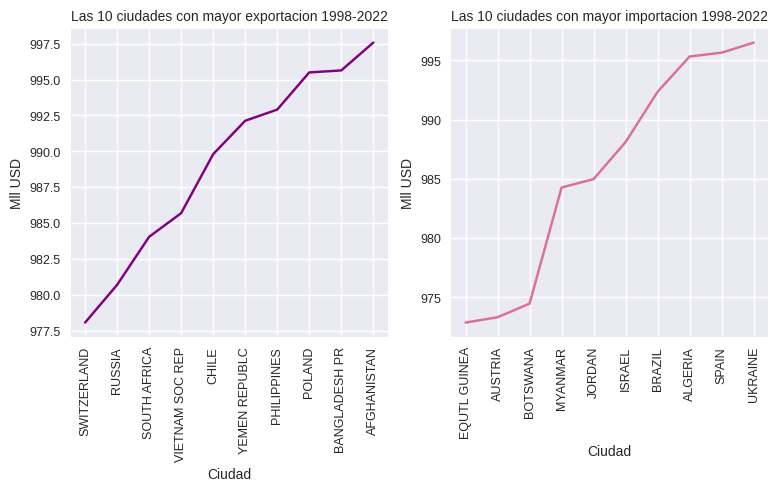

In [374]:
plt.figure(figsize=(9,4))
# Subplot 1
plt.subplot(1, 2, 1);
plt.plot(x1, y_export, c= 'purple');
plt.xticks(fontsize = 9, rotation = 90);
plt.yticks(fontsize = 9);
#plt.xlim(left=1892,right=2020)
#plt.ylim(bottom=977,top=1000)
plt.xlabel('Ciudad', fontsize = 10)
plt.ylabel('Mll USD', fontsize = 10)
plt.title('Las 10 ciudades con mayor exportacion 1998-2022', fontsize = 10)
# Subplot 1
plt.subplot(1, 2, 2);
plt.plot(x2, y_import, c= 'palevioletred');
plt.xticks(fontsize = 9, rotation = 90);
plt.yticks(fontsize = 9);
#plt.xlim(left=1892,right=2020)
#plt.ylim(bottom=977,top=1000)
plt.xlabel('Ciudad', fontsize = 10)
plt.ylabel('Mll USD', fontsize = 10)
plt.title('Las 10 ciudades con mayor importacion 1998-2022', fontsize = 10)
plt.show()

In [375]:
a=df.sort_values(by='Export', ascending=False).head(10)
b=a.groupby('Country')[['Export']].sum()
c=b.sort_values(by='Export', ascending=False)
c

,Export
Country,
AFGHANISTAN,997.58
BANGLADESH PR,995.64
POLAND,995.50
PHILIPPINES,992.91
YEMEN REPUBLC,992.13
CHILE,989.80
VIETNAM SOC REP,985.69
SOUTH AFRICA,984.04
RUSSIA,980.69


In [376]:
d=df.sort_values(by='Import', ascending=False).head(10)
e=d.groupby('Country')[['Import']].sum()
f=e.sort_values(by='Import', ascending=False)
f

,Import
Country,
UKRAINE,996.49
SPAIN,995.64
ALGERIA,995.32
BRAZIL,992.35
ISRAEL,988.11
JORDAN,984.98
MYANMAR,984.27
BOTSWANA,974.48
AUSTRIA,973.33


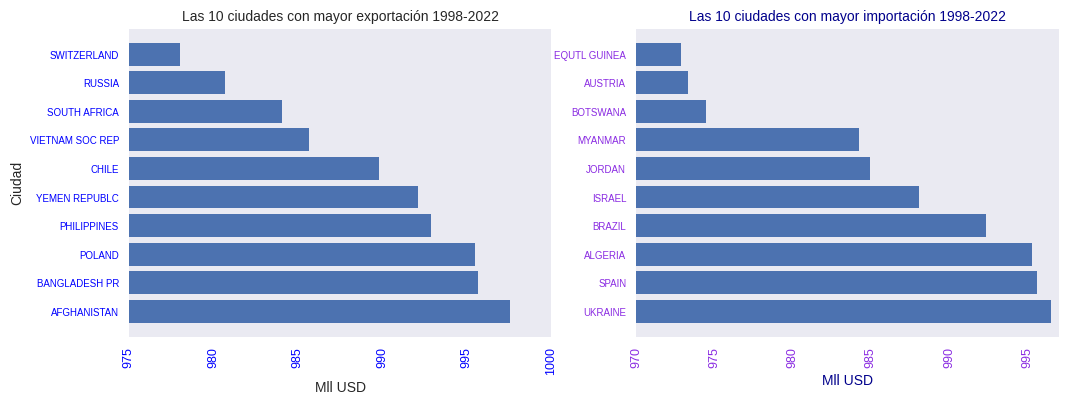

In [377]:
total = c.sum(axis=1)
total2 = f.sum(axis=1)

plt.figure(figsize=(12,4))
# Subplot 1
plt.subplot(1, 2, 1);
plt.barh(total.index, total);
plt.xticks(fontsize = 9, rotation = 90, c='blue');
plt.yticks(fontsize = 7, c='blue');
plt.xlim(left=975,right=1000)
plt.xlabel('Mll USD', fontsize = 10)
plt.ylabel('Ciudad', fontsize = 10)
plt.title('Las 10 ciudades con mayor exportación 1998-2022', fontsize = 10)
plt.grid()
# Subplot 2
plt.subplot(1, 2, 2);
plt.barh(total2.index, total2);
plt.xticks(fontsize = 9, rotation = 90, c='blueviolet');
plt.yticks(fontsize = 7, c='blueviolet');
plt.xlim(left=970,right=997)
plt.xlabel('Mll USD', fontsize = 10 , c='darkblue')
#plt.ylabel('Ciudad', fontsize = 10, c='darkblue')
plt.title('Las 10 ciudades con mayor importación 1998-2022', fontsize = 10, c='darkblue')
plt.grid()